In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_csv('./heart+disease/processed.cleveland.data',header=None,sep=',')

In [12]:
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','DISEASE']

In [14]:
df.iloc[:,13] = df["DISEASE"].apply(lambda x: 1 if x > 0 else 0)

In [16]:
df["DISEASE"].value_counts()

DISEASE
0    164
1    139
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  DISEASE   303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
for col in df.columns:
    print(col,df[col].value_counts())

#df.iloc[:,"ca"] = pd.to_numeric(df["ca"],errors='coerce')

ca ['0.0' '3.0' '2.0' '1.0' '?']
ca ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64
thal ['6.0' '3.0' '7.0' '?']
thal thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64


In [28]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [31]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col])
        #print(col,df[col].value_counts())


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  DISEASE   297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [17]:
def CreateDataLoaders(Dataset, BatchSize = 0, TestSize = .2, Shuffle = True, DropLast = True, Use_ScalerMinMax = False, Use_ScalerStandard = False):
    # create a dataframe
    resp = torch.tensor(Dataset.iloc[:, -1].values).float()
    resp = resp[:, None]
    
    data_X = Dataset.iloc[:, :-1]
    
    if Use_ScalerMinMax == True:
        data_tmp = MinMaxScaler().fit_transform(data_X)
        data = torch.tensor(data_tmp).float()
        del data_tmp

    elif Use_ScalerStandard == True:
        data_tmp = StandardScaler().fit_transform(data_X)
        data = torch.tensor(data_tmp).float()
        del data_tmp
    
    else:
        data = torch.tensor(data_X.values).float()
    
    # split the data into training and testing sets
    train_data,test_data, train_labels,test_labels = train_test_split(data, resp, test_size=TestSize)

    # then convert them into PyTorch Datasets (note: already converted to tensors)
    train_data = TensorDataset(train_data,train_labels)
    test_data  = TensorDataset(test_data,test_labels)

    # finally, translate into dataloader objects
    train_loader = DataLoader(train_data,batch_size=BatchSize,shuffle=Shuffle,drop_last=DropLast)
    test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])
    
    return train_loader, test_loader

In [33]:
train_loader, test_loader = CreateDataLoaders(df, BatchSize = 16, TestSize = .2, Shuffle = True, DropLast = True, Use_ScalerMinMax = False, Use_ScalerStandard = False)

In [34]:
next(iter(test_loader))

[tensor([[4.3000e+01, 1.0000e+00, 3.0000e+00, 1.3000e+02, 3.1500e+02, 0.0000e+00,
          0.0000e+00, 1.6200e+02, 0.0000e+00, 1.9000e+00, 1.0000e+00, 1.0000e+00,
          3.0000e+00],
         [5.8000e+01, 1.0000e+00, 4.0000e+00, 1.5000e+02, 2.7000e+02, 0.0000e+00,
          2.0000e+00, 1.1100e+02, 1.0000e+00, 8.0000e-01, 1.0000e+00, 0.0000e+00,
          7.0000e+00],
         [3.4000e+01, 1.0000e+00, 1.0000e+00, 1.1800e+02, 1.8200e+02, 0.0000e+00,
          2.0000e+00, 1.7400e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
          3.0000e+00],
         [5.7000e+01, 0.0000e+00, 4.0000e+00, 1.4000e+02, 2.4100e+02, 0.0000e+00,
          0.0000e+00, 1.2300e+02, 1.0000e+00, 2.0000e-01, 2.0000e+00, 0.0000e+00,
          7.0000e+00],
         [6.0000e+01, 0.0000e+00, 4.0000e+00, 1.5800e+02, 3.0500e+02, 0.0000e+00,
          2.0000e+00, 1.6100e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
          3.0000e+00],
         [5.8000e+01, 1.0000e+00, 3.0000e+00, 1.3200e+02, 2.2400e

In [35]:
# create a class for the model
def CreateANNModel(nInput=2, nUnits=8, nLayers=2, lossFunc='MSELoss', Optimizer='Adam', 
                   LearningRate=0.01, ActivationFunc='ReLU', DropoutRate=0.0, WeightDecay=0.00, 
                   BatchNorm=False, Momentum=0.9):

    class ANNtorch(nn.Module):
        def __init__(self, nInput=2, nLayers=2, nUnits=8, ActivationFunc='ReLU', DropoutRate=0.1):
            super().__init__()

            # create dictionary to store the layers
            self.layers = nn.ModuleDict()
            self.nLayers = nLayers
            self.activation = getattr(F, ActivationFunc.lower())
            self.dropout = nn.Dropout(DropoutRate)

            ### input layer
            self.layers['input'] = nn.Linear(nInput, nUnits)
            
            ### hidden layers
            for i in range(nLayers):
                self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits)
                if BatchNorm == True:
                    self.layers[f'batchnorm{i}'] = nn.BatchNorm1d(nUnits)

            ### output layer
            self.layers['output'] = nn.Linear(nUnits, 1)
        
        # forward pass
        def forward(self, x):
            # input layer
            x = self.activation(self.layers['input'](x))
            x = self.dropout(x)

            # hidden layers
            for i in range(self.nLayers):
                x = self.activation(self.layers[f'hidden{i}'](x))
                if BatchNorm == True:
                    x = self.layers[f'batchnorm{i}'](x)
                x = self.dropout(x)
            
            # return output layer
            x = self.layers['output'](x)
            return x

    # create the model
    ANNModel = ANNtorch(nInput, nLayers, nUnits, ActivationFunc, DropoutRate)
    
    lossFunc = getattr(nn, lossFunc)    
    lossfun = lossFunc()
    
    optimizerFunc = getattr(torch.optim, Optimizer)
    if Optimizer == 'SGD':
        optimizer = optimizerFunc(ANNModel.parameters(), lr=LearningRate, weight_decay=WeightDecay, momentum=Momentum)
    else:
        optimizer = optimizerFunc(ANNModel.parameters(), lr=LearningRate, weight_decay=WeightDecay)
    
    return ANNModel, lossfun, optimizer


In [36]:
ANNModel, lossfun, optimizer = CreateANNModel(nInput=13, nUnits=20, nLayers=2, lossFunc='BCEWithLogitsLoss', Optimizer='Adam', ActivationFunc='relu', LearningRate=0.01)

In [37]:
ANNModel

ANNtorch(
  (layers): ModuleDict(
    (input): Linear(in_features=13, out_features=20, bias=True)
    (hidden0): Linear(in_features=20, out_features=20, bias=True)
    (hidden1): Linear(in_features=20, out_features=20, bias=True)
    (output): Linear(in_features=20, out_features=1, bias=True)
  )
  (dropout): Dropout(p=0.0, inplace=False)
)

In [38]:
num_epochs = 2

In [39]:
losses = torch.zeros(num_epochs,2)

In [37]:
num_epochs = 100

In [59]:
def PlotResults():
    # Plotting losses
    plt.figure(figsize=(12, 5))

    # Training and Test Loss
    plt.subplot(1, 2, 1)
    plt.plot(losses[:, 0], label='Training Loss')
    plt.plot(losses[:, 1], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    #plt.ylim(0, 100)
    plt.title('Loss by Epoch')
    plt.legend()

    # Training and Test Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy[:, 0], label='Training Accuracy')
    plt.plot(accuracy[:, 1], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy by Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [47]:
def TrainModel(df, num_epochs = 100, BatchSize = 2, TestSize = .2, Shuffle = True, DropLast = True, Use_ScalerMinMax = False, Use_ScalerStandard = False,
               nInput=2, nUnits=8, nLayers=2, lossFunc='MSELoss', Optimizer='Adam', LearningRate=0.01, ActivationFunc='ReLU', DropoutRate=0.0, 
               WeightDecay=0.00, BatchNorm=False, Momentum=0.9):

    num_epochs = num_epochs

    train_loader, test_loader = CreateDataLoaders(df, BatchSize, TestSize, Shuffle, DropLast, Use_ScalerMinMax, Use_ScalerStandard)

    ANNModel, lossfun, optimizer = CreateANNModel(nInput, nUnits, nLayers, lossFunc, Optimizer, LearningRate, ActivationFunc, DropoutRate, WeightDecay, 
                                                  BatchNorm, Momentum)
    losses = torch.zeros(num_epochs, 2)
    accuracy = torch.zeros(num_epochs, 2)

    for epoch in range(num_epochs):

        ANNModel.train()
        batchLoss = []
        batchAcc = []

        # Train
        for X, y in train_loader:
            yHat = ANNModel(X)
            loss = lossfun(yHat, y)
            
            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())
            
            # compute accuracy
            predictions = torch.sigmoid(yHat) > 0.5
            accuracyPct = 100 * torch.mean((predictions == y).float()).item()
            batchAcc.append(accuracyPct)
            
        losses[epoch, 0] = np.mean(batchLoss)
        accuracy[epoch, 0] = np.mean(batchAcc)
        
        # Test
        ANNModel.eval()
        X, y = next(iter(test_loader))
        with torch.no_grad():
            yHat = ANNModel(X)
        losses[epoch, 1] = lossfun(yHat, y).item()
        predictions = torch.sigmoid(yHat) > 0.5
        accuracy[epoch, 1] = 100 * torch.mean((predictions == y).float()).item()
        
        # print out the epoch, training loss, and test loss for each 5th epoch
        if (epoch % 5 == 0) & (epoch > 0):
            print(f'Epoch {epoch} - Training Loss: {losses[epoch - 5:epoch, 0].mean():.4f} - Test Loss: {losses[epoch - 5:epoch, 1].mean():.4f} - Train Accuracy: {accuracy[epoch - 5:epoch, 0].mean():.2f}% - Test Accuracy: {accuracy[epoch - 5:epoch, 1].mean():.2f}%')
    
    return ANNModel, losses, accuracy, train_loader, test_loader, ANNModel, lossfun, optimizer


In [112]:
ANNModel, losses, accuracy, train_loader, test_loader, ANNModel, lossfun, optimizer = TrainModel(df, num_epochs= 150, BatchSize=16,TestSize=.2, nInput=13, nUnits=32, 
                                                                                                 nLayers=4, lossFunc='BCEWithLogitsLoss', Optimizer='Adam',
                                                                                                 ActivationFunc='relu', DropoutRate=0, WeightDecay=0,
                                                                                                 BatchNorm=False, LearningRate=0.001,Use_ScalerMinMax = False, Use_ScalerStandard = False)

Epoch 5 - Training Loss: 0.6626 - Test Loss: 0.6265 - Train Accuracy: 58.48% - Test Accuracy: 70.67%
Epoch 10 - Training Loss: 0.6082 - Test Loss: 0.5531 - Train Accuracy: 66.16% - Test Accuracy: 72.33%
Epoch 15 - Training Loss: 0.5872 - Test Loss: 0.5536 - Train Accuracy: 67.59% - Test Accuracy: 74.00%
Epoch 20 - Training Loss: 0.5701 - Test Loss: 0.5396 - Train Accuracy: 70.62% - Test Accuracy: 74.33%
Epoch 25 - Training Loss: 0.5515 - Test Loss: 0.5266 - Train Accuracy: 71.07% - Test Accuracy: 75.00%
Epoch 30 - Training Loss: 0.5306 - Test Loss: 0.5255 - Train Accuracy: 73.39% - Test Accuracy: 77.33%
Epoch 35 - Training Loss: 0.4926 - Test Loss: 0.4921 - Train Accuracy: 75.27% - Test Accuracy: 79.67%
Epoch 40 - Training Loss: 0.4670 - Test Loss: 0.4896 - Train Accuracy: 77.86% - Test Accuracy: 77.67%
Epoch 45 - Training Loss: 0.4517 - Test Loss: 0.4696 - Train Accuracy: 78.39% - Test Accuracy: 79.67%
Epoch 50 - Training Loss: 0.4221 - Test Loss: 0.4787 - Train Accuracy: 81.70% - Tes

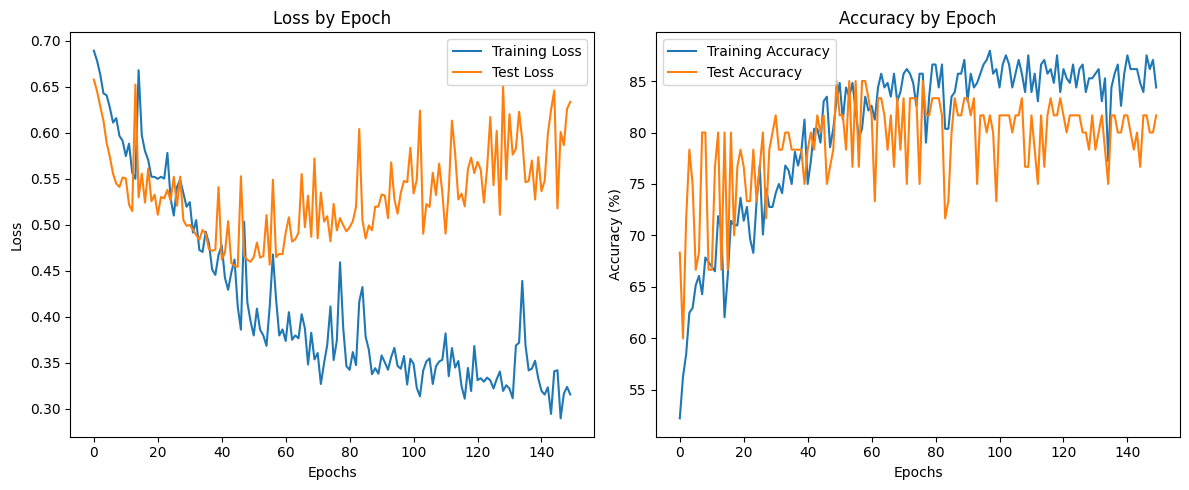

In [113]:
PlotResults()

In [101]:
ANNModel, losses, accuracy, train_loader, test_loader, ANNModel, lossfun, optimizer = TrainModel(df, num_epochs= 200, BatchSize=16,TestSize=.2, nInput=13, nUnits=32, 
                                                                                                 nLayers=4, lossFunc='BCEWithLogitsLoss', Optimizer='Adam',
                                                                                                 ActivationFunc='relu', DropoutRate=0.1, WeightDecay=0.001,
                                                                                                 BatchNorm=False, LearningRate=0.001,Use_ScalerMinMax = False, Use_ScalerStandard = False)

Epoch 5 - Training Loss: 0.6879 - Test Loss: 0.6793 - Train Accuracy: 54.64% - Test Accuracy: 57.67%
Epoch 10 - Training Loss: 0.6670 - Test Loss: 0.6320 - Train Accuracy: 60.36% - Test Accuracy: 66.67%
Epoch 15 - Training Loss: 0.6481 - Test Loss: 0.6091 - Train Accuracy: 62.68% - Test Accuracy: 69.00%
Epoch 20 - Training Loss: 0.6312 - Test Loss: 0.5811 - Train Accuracy: 64.91% - Test Accuracy: 68.33%
Epoch 25 - Training Loss: 0.6103 - Test Loss: 0.5644 - Train Accuracy: 65.27% - Test Accuracy: 72.00%
Epoch 30 - Training Loss: 0.5949 - Test Loss: 0.5361 - Train Accuracy: 68.75% - Test Accuracy: 75.33%
Epoch 35 - Training Loss: 0.5736 - Test Loss: 0.5111 - Train Accuracy: 70.98% - Test Accuracy: 74.67%
Epoch 40 - Training Loss: 0.5734 - Test Loss: 0.5015 - Train Accuracy: 71.61% - Test Accuracy: 76.00%
Epoch 45 - Training Loss: 0.5493 - Test Loss: 0.4908 - Train Accuracy: 73.30% - Test Accuracy: 75.33%
Epoch 50 - Training Loss: 0.5401 - Test Loss: 0.4731 - Train Accuracy: 74.02% - Tes

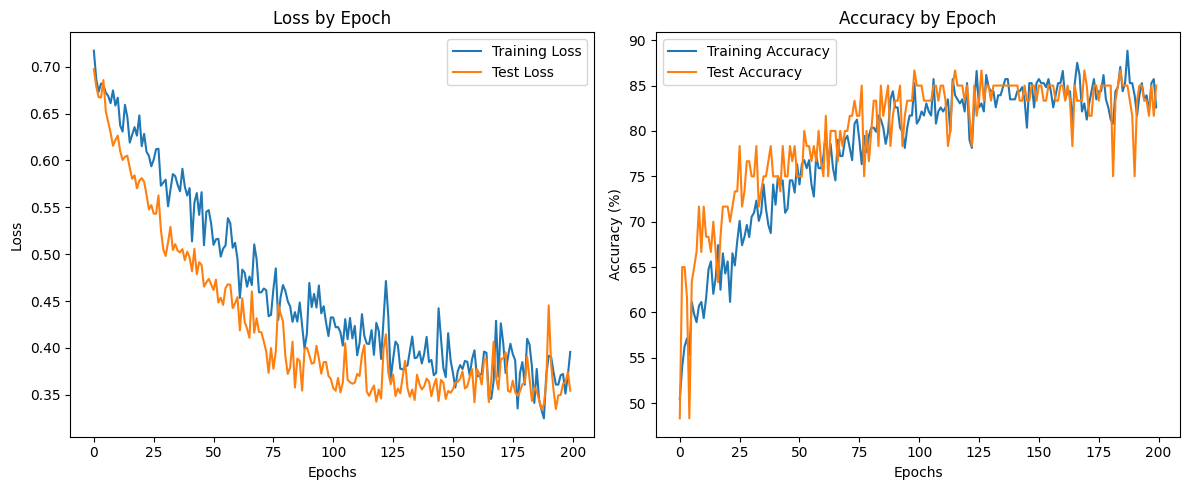

In [102]:
PlotResults()

Epoch 5 - Training Loss: 0.6459 - Test Loss: 0.5806 - Train Accuracy: 65.80% - Test Accuracy: 76.67%
Epoch 10 - Training Loss: 0.4093 - Test Loss: 0.3219 - Train Accuracy: 83.84% - Test Accuracy: 88.00%
Epoch 15 - Training Loss: 0.3768 - Test Loss: 0.2964 - Train Accuracy: 84.91% - Test Accuracy: 89.67%
Epoch 20 - Training Loss: 0.3542 - Test Loss: 0.2613 - Train Accuracy: 85.98% - Test Accuracy: 90.33%
Epoch 25 - Training Loss: 0.3354 - Test Loss: 0.2403 - Train Accuracy: 86.70% - Test Accuracy: 91.67%
Epoch 30 - Training Loss: 0.3048 - Test Loss: 0.2289 - Train Accuracy: 87.32% - Test Accuracy: 91.33%
Epoch 35 - Training Loss: 0.2933 - Test Loss: 0.2066 - Train Accuracy: 89.20% - Test Accuracy: 92.33%
Epoch 40 - Training Loss: 0.2694 - Test Loss: 0.1983 - Train Accuracy: 89.73% - Test Accuracy: 93.67%
Epoch 45 - Training Loss: 0.2360 - Test Loss: 0.2060 - Train Accuracy: 90.89% - Test Accuracy: 90.67%
Epoch 50 - Training Loss: 0.2100 - Test Loss: 0.1987 - Train Accuracy: 91.61% - Tes

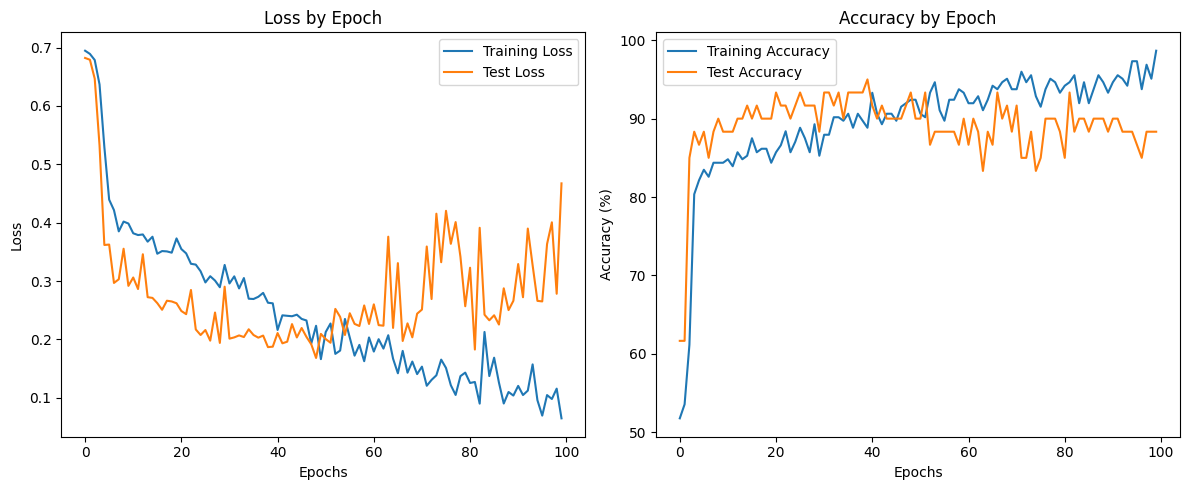

In [91]:
ANNModel, losses, accuracy, train_loader, test_loader, ANNModel, lossfun, optimizer = TrainModel(df, num_epochs= 100, BatchSize=16,TestSize=.2, nInput=13, nUnits=64, 
                                                                                                    nLayers=4, lossFunc='BCEWithLogitsLoss', Optimizer='Adam',
                                                                                                    ActivationFunc='relu', DropoutRate=0.1, WeightDecay=0,
                                                                                                    BatchNorm=False, LearningRate=0.001,Use_ScalerMinMax = True, Use_ScalerStandard = True)

PlotResults()

Epoch 5 - Training Loss: 0.5539 - Test Loss: 0.5414 - Train Accuracy: 72.50% - Test Accuracy: 75.67%
Epoch 10 - Training Loss: 0.3172 - Test Loss: 0.4319 - Train Accuracy: 86.96% - Test Accuracy: 81.33%
Epoch 15 - Training Loss: 0.2659 - Test Loss: 0.4558 - Train Accuracy: 89.55% - Test Accuracy: 80.33%
Epoch 20 - Training Loss: 0.2036 - Test Loss: 0.4964 - Train Accuracy: 92.23% - Test Accuracy: 78.67%
Epoch 25 - Training Loss: 0.1425 - Test Loss: 0.6561 - Train Accuracy: 94.91% - Test Accuracy: 76.67%
Epoch 30 - Training Loss: 0.0964 - Test Loss: 0.7968 - Train Accuracy: 96.61% - Test Accuracy: 78.00%
Epoch 35 - Training Loss: 0.0755 - Test Loss: 0.8760 - Train Accuracy: 97.41% - Test Accuracy: 77.00%
Epoch 40 - Training Loss: 0.0680 - Test Loss: 1.0098 - Train Accuracy: 97.77% - Test Accuracy: 77.00%
Epoch 45 - Training Loss: 0.0657 - Test Loss: 1.0756 - Train Accuracy: 97.68% - Test Accuracy: 78.00%
Epoch 50 - Training Loss: 0.0343 - Test Loss: 1.2080 - Train Accuracy: 98.75% - Tes

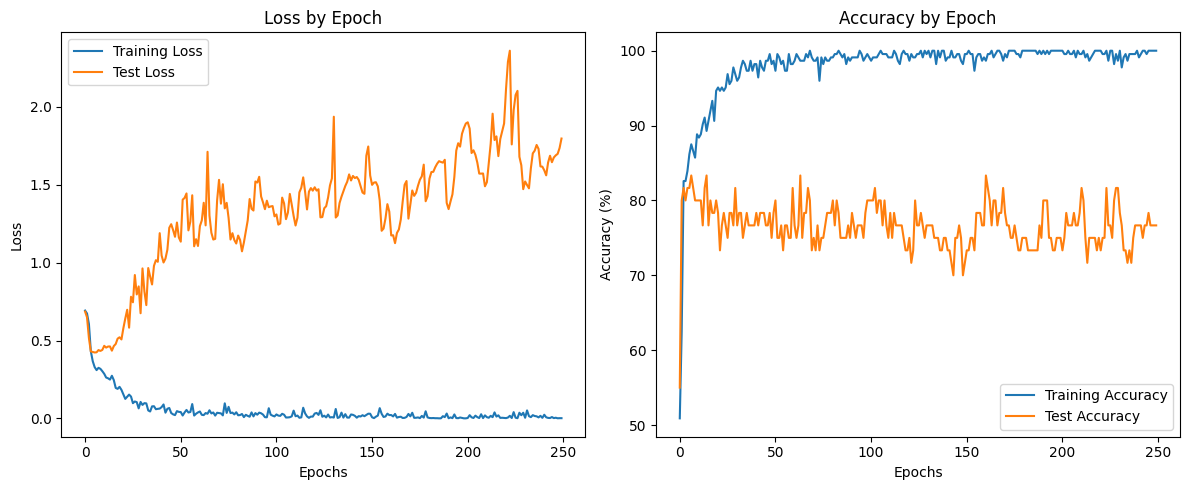

In [100]:
ANNModel, losses, accuracy, train_loader, test_loader, ANNModel, lossfun, optimizer = TrainModel(df, num_epochs= 250, BatchSize=16,TestSize=.2, nInput=13, nUnits=64, 
                                                                                                    nLayers=4, lossFunc='BCEWithLogitsLoss', Optimizer='Adam',
                                                                                                    ActivationFunc='relu', DropoutRate=0.1, WeightDecay=0,
                                                                                                    BatchNorm=False, LearningRate=0.001,Use_ScalerMinMax = False, Use_ScalerStandard = True)

PlotResults()